In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing, neighbors
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('medical_clean.csv')

In [3]:
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860       17939.403420     3     3      2   
1  30.84513 -85.22907  ...  4193.190458       17612.998120     3     4      3   
2  43.54321 -96.63772  ...  2434.234222       17505.192460     2     4      4   
3  43.89744 -93.51479  ...  2127.830423       12993.437350     3     5      5   
4  37.59894 -76.88958  ...  2113.073274        3716.525786     2     1      3   

   Item4  Item5 Item6 Item7 Item8  
0      2      4     3     3     4  
1      4      4     4     3     3  
2      4      3     4     3     3  
3      3      4     5     5     5  
4      3      5     3     4     3  

[5 rows x 50 columns]

In [4]:
df.shape

(10000, 50)

In [5]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City','County',\
         'Zip', 'Lat', 'Lng','County', 'Zip', 'Lat', 'Lng'], axis = 1)

State  Population      Area          TimeZone  \
0       AL        2951  Suburban   America/Chicago   
1       FL       11303     Urban   America/Chicago   
2       SD       17125  Suburban   America/Chicago   
3       MN        2162  Suburban   America/Chicago   
4       VA        5287     Rural  America/New_York   
...    ...         ...       ...               ...   
9995    NC        4762     Urban  America/New_York   
9996    NJ        1251     Urban  America/New_York   
9997    TN         532     Rural   America/Chicago   
9998    SD         271     Rural    America/Denver   
9999    PA       41524     Urban  America/New_York   

                                       Job  Children  Age    Income  \
0         Psychologist, sport and exercise         1   53  86575.93   
1             Community development worker         3   51  46805.99   
2                  Chief Executive Officer         3   53  14370.14   
3                      Early years teacher         0   78  39741.49   
4              Health promotion specialist         1   22   1209.56   
...                                    ...       ...  ...       ...   
9995                Programmer, multimedia         2   25  45967.61   
9996         Restaurant manager, fast food         4   87  14983.02   
9997            Psychologist, occupational         3   45  65917.81   
9998  Outdoor activities/education manager         3   43  29702.32   
9999            Sports development officer         8   70  62682.63   

        Marital  Gender  ...  TotalCharge  Additional_charges  Item1  Item2  \
0      Divorced    Male  ...  3726.702860        17939.403420      3      3   
1       Married  Female  ...  4193.190458        17612.998120      3      4   
2       Widowed  Female  ...  2434.234222        17505.192460      2      4   
3       Married    Male  ...  2127.830423        12993.437350      3      5   
4       Widowed  Female  ...  2113.073274         3716.525786      2      1   
...         ...     ...  ...          ...                 ...    ...    ...   
9995    Widowed    Male  ...  6850.942000         8927.642000      3      2   
9996    Widowed    Male  ...  7741.690000        28507.150000      3      3   
9997  Separated  Female  ...  8276.481000        15281.210000      3      3   
9998   Divorced    Male  ...  7644.483000         7781.678000      5      5   
9999  Separated  Female  ...  7887.553000        11643.190000      4      3   

      Item3 Item4 Item5 Item6 Item7 Item8  
0         2     2     4     3     3     4  
1         3     4     4     4     3     3  
2         4     4     3     4     3     3  
3         5     3     4     5     5     5  
4         3     3     5     3     4     3  
...     ...   ...   ...   ...   ...   ...  
9995      2     3     4     3     4     2  
9996      4     2     5     3     4     4  
9997      3     4     4     2     3     2  
9998      3     4     4     3     4     3  
9999      3     2     3     6     4     3  

[10000 rows x 41 columns]

In [7]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature CaseOrder :10000
The number of values for feature Customer_id :10000
The number of values for feature Interaction :10000
The number of values for feature UID :10000
The number of values for feature City :6072
The number of values for feature State :52
The number of values for feature County :1607
The number of values for feature Zip :8612
The number of values for feature Lat :8588
The number of values for feature Lng :8725
The number of values for feature Population :5951
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature TimeZone :26 -- ['America/Adak' 'America/Anchorage' 'America/Boise' 'America/Chicago'
 'America/Denver' 'America/Detroit' 'America/Indiana/Indianapolis'
 'America/Indiana/Knox' 'America/Indiana/Marengo'
 'America/Indiana/Tell_City' 'America/Indiana/Vevay'
 'America/Indiana/Vincennes' 'America/Indiana/Winamac'
 'America/Kentucky/Louisville' 'America/Los_Angeles' 'America/Menominee'


In [8]:

df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City','County', 'Zip', 
         'Lat', 'Lng','County', 'Zip', 'Lat', 'Lng','Population','Job','Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8','TimeZone'], axis = 1)

In [9]:
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature State :52
The number of values for feature Area :3 -- ['Rural' 'Suburban' 'Urban']
The number of values for feature Children :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Age :72
The number of values for feature Income :9993
The number of values for feature Marital :5 -- ['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']
The number of values for feature Gender :3 -- ['Female' 'Male' 'Nonbinary']
The number of values for feature ReAdmis :2 -- ['No' 'Yes']
The number of values for feature VitD_levels :9976
The number of values for feature Doc_visits :9 -- [1 2 3 4 5 6 7 8 9]
The number of values for feature Full_meals_eaten :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature vitD_supp :6 -- [0 1 2 3 4 5]
The number of values for feature Soft_drink :2 -- ['No' 'Yes']
The number of values for feature Initial_admin :3 -- ['Elective Admission' 'Emergency Admission' 'Observation Admission']
The number of values for f

In [10]:
df.isnull().sum()

State                 0
Area                  0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [11]:
vals = df[['Children','Age','VitD_levels','Doc_visits','Full_meals_eaten',\
           'vitD_supp','Initial_days', 'TotalCharge','Additional_charges','ReAdmis', 'Income']]

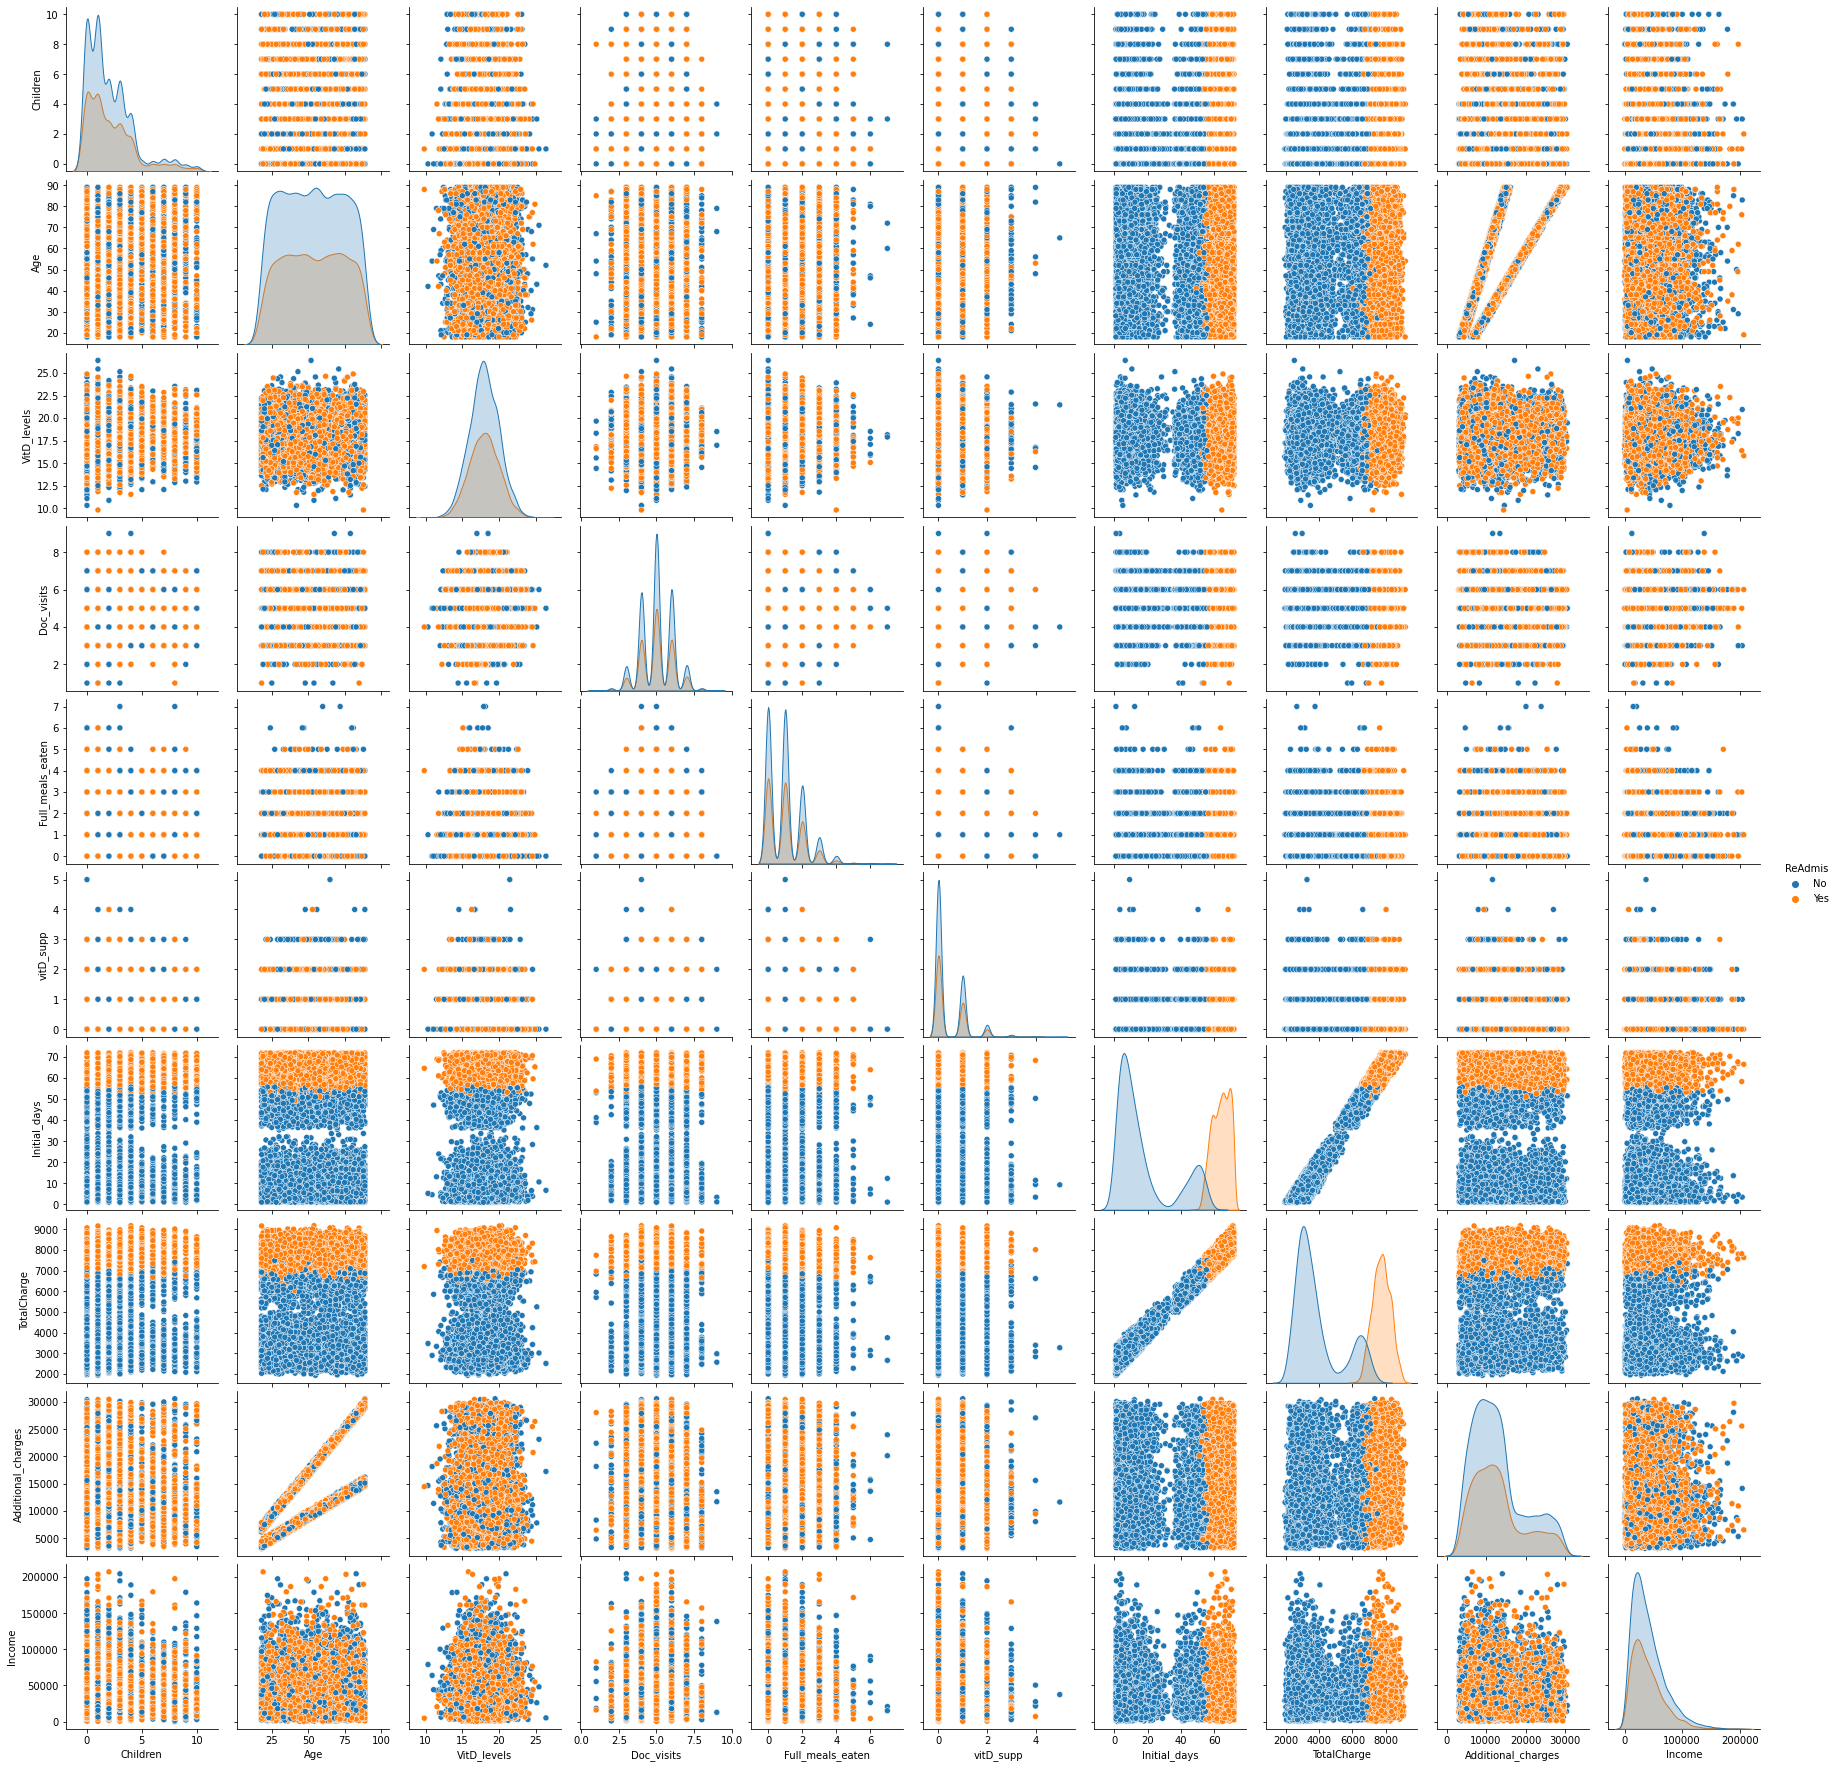

In [12]:
g = sns.pairplot(vals, hue = 'ReAdmis')

In [20]:
features = ['Area','Marital', 'Gender', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services']

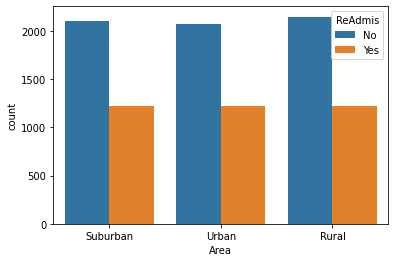

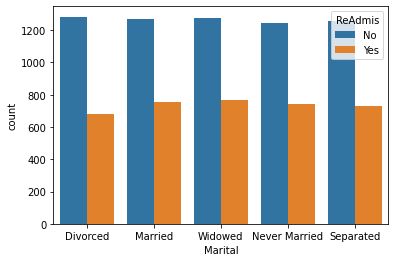

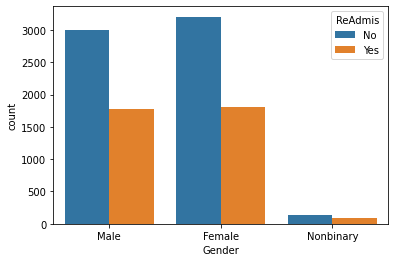

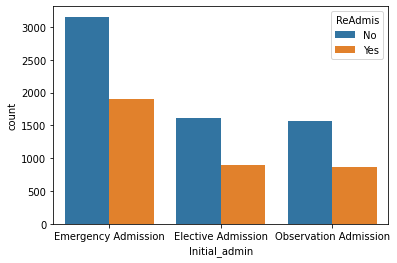

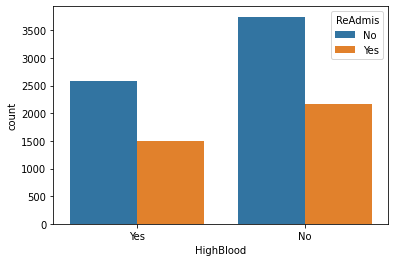

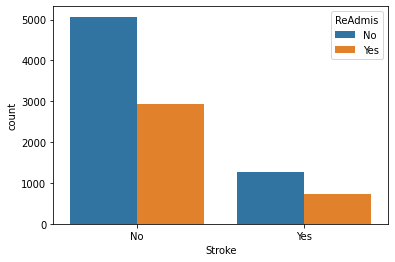

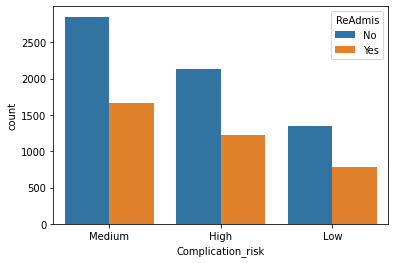

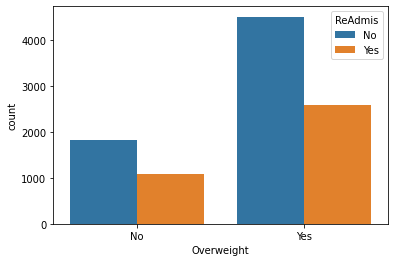

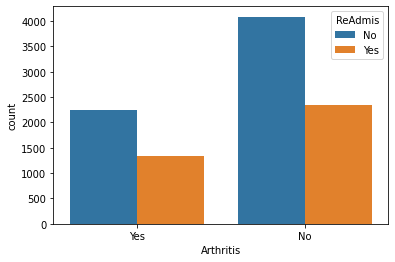

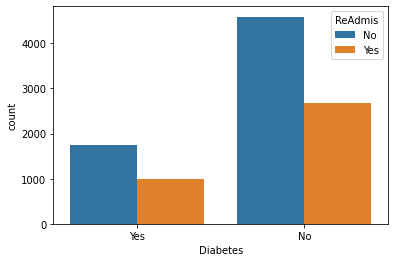

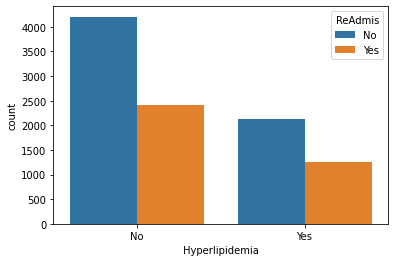

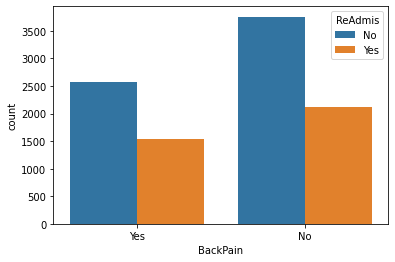

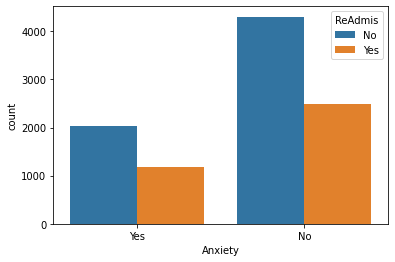

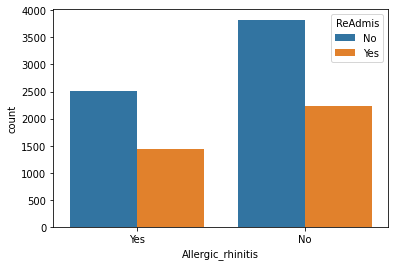

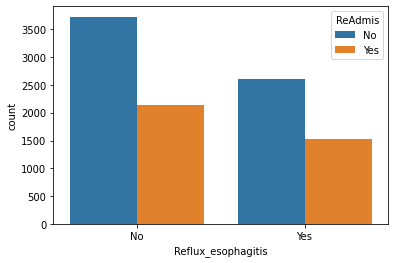

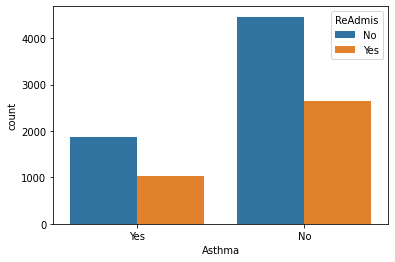

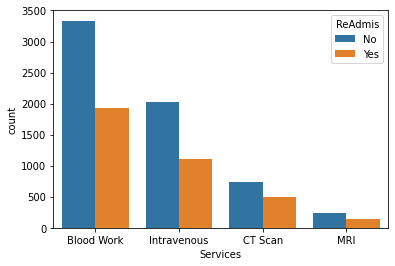

In [21]:
for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data = df, hue = 'ReAdmis')

In [22]:
df = pd.get_dummies(df)

In [24]:
print(df.head)

<bound method NDFrame.head of       Children  Age    Income  VitD_levels  Doc_visits  Full_meals_eaten  \
0            1   53  86575.93    19.141466           6                 0   
1            3   51  46805.99    18.940352           4                 2   
2            3   53  14370.14    18.057507           4                 1   
3            0   78  39741.49    16.576858           4                 1   
4            1   22   1209.56    17.439069           5                 0   
...        ...  ...       ...          ...         ...               ...   
9995         2   25  45967.61    16.980860           4                 2   
9996         4   87  14983.02    18.177020           5                 0   
9997         3   45  65917.81    17.129070           4                 2   
9998         3   43  29702.32    19.910430           5                 2   
9999         8   70  62682.63    18.388620           5                 0   

      vitD_supp  Initial_days  TotalCharge  Additional_ch

In [25]:
df.corr()

Children       Age    Income  VitD_levels  Doc_visits  \
Children              1.000000  0.009836  0.007176     0.009487   -0.002292   
Age                   0.009836  1.000000 -0.012228     0.010315    0.006898   
Income                0.007176 -0.012228  1.000000    -0.013115    0.013464   
VitD_levels           0.009487  0.010315 -0.013115     1.000000    0.010210   
Doc_visits           -0.002292  0.006898  0.013464     0.010210    1.000000   
...                        ...       ...       ...          ...         ...   
Asthma_Yes            0.002324  0.009229  0.005904     0.004937   -0.017989   
Services_Blood Work  -0.009050 -0.013355 -0.000123     0.001475    0.003403   
Services_CT Scan      0.001541  0.009506 -0.007827     0.008048    0.014600   
Services_Intravenous  0.010741  0.004142  0.006678    -0.001984   -0.008700   
Services_MRI         -0.005061  0.008529 -0.002456    -0.012840   -0.012822   

                      Full_meals_eaten  vitD_supp  Initial_days  TotalCharge  \
Children                      0.003835  -0.004319      0.022467     0.024100   
Age                           0.008555   0.010014      0.016264     0.016876   
Income                       -0.011365   0.001253     -0.012465    -0.014345   
VitD_levels                   0.023223  -0.007203     -0.003642    -0.001403   
Doc_visits                   -0.002767   0.005681     -0.006754    -0.005043   
...                                ...        ...           ...          ...   
Asthma_Yes                    0.012459  -0.021763     -0.013496    -0.014290   
Services_Blood Work          -0.005835  -0.014407      0.006272     0.005271   
Services_CT Scan             -0.002939  -0.000317      0.007786     0.010561   
Services_Intravenous          0.016177   0.011475     -0.015430    -0.016170   
Services_MRI                 -0.018954   0.010334      0.007692     0.007341   

                      Additional_charges  ...  Allergic_rhinitis_No  \
Children                        0.013548  ...              0.019207   
Age                             0.716854  ...             -0.012092   
Income                         -0.009825  ...              0.001401   
VitD_levels                     0.008290  ...              0.005035   
Doc_visits                      0.008072  ...             -0.002920   
...                                  ...  ...                   ...   
Asthma_Yes                      0.014083  ...             -0.004454   
Services_Blood Work            -0.011490  ...              0.001204   
Services_CT Scan                0.013137  ...             -0.007008   
Services_Intravenous           -0.001095  ...              0.003766   
Services_MRI                    0.010134  ...             -0.000259   

                      Allergic_rhinitis_Yes  Reflux_esophagitis_No  \
Children                          -0.019207              -0.005639   
Age                                0.012092               0.019609   
Income                            -0.001401              -0.016497   
VitD_levels                       -0.005035               0.014419   
Doc_visits                         0.002920               0.005330   
...                                     ...                    ...   
Asthma_Yes                         0.004454               0.001458   
Services_Blood Work               -0.001204              -0.008102   
Services_CT Scan                   0.007008              -0.017628   
Services_Intravenous              -0.003766               0.022007   
Services_MRI                       0.000259              -0.001986   

                      Reflux_esophagitis_Yes  Asthma_No  Asthma_Yes  \
Children                            0.005639  -0.002324    0.002324   
Age                                -0.019609  -0.009229    0.009229   
Income                              0.016497  -0.005904    0.005904   
VitD_levels                        -0.014419  -0.004937    0.004937   
Doc_visits                         -0.005330   0.017989   -0.01

In [27]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[-4470:-4460])

State_WI             State_VT                               0.011489
Additional_charges   Services_Blood Work                    0.011490
Services_Blood Work  Additional_charges                     0.011490
State_MA             Gender_Male                            0.011497
Gender_Male          State_MA                               0.011497
Marital_Divorced     State_MN                               0.011497
State_MN             Marital_Divorced                       0.011497
State_UT             State_CO                               0.011497
State_CO             State_UT                               0.011497
State_MN             Initial_admin_Observation Admission    0.011501
dtype: float64


In [28]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [29]:
for index, value in sol.items():


SyntaxError: unexpected EOF while parsing (<ipython-input-29-92dfb5572d19>, line 1)

In [31]:
print(df.corr().unstack().sort_values().drop_duplicates())

Overweight_No       Overweight_Yes   -1.000000
HighBlood_No        HighBlood_Yes    -1.000000
Asthma_No           Asthma_Yes       -1.000000
BackPain_No         BackPain_Yes     -1.000000
Soft_drink_Yes      Soft_drink_No    -1.000000
                                        ...   
Additional_charges  Age               0.716854
TotalCharge         ReAdmis_Yes       0.843726
Initial_days        ReAdmis_Yes       0.850862
TotalCharge         Initial_days      0.987640
Children            Children          1.000000
Length: 5874, dtype: float64


In [38]:
corr = df.corr() # df is the pandas dataframe
c1 = corr.abs().unstack()
c1.sort_values(ascending = True)

Marital_Separated     VitD_levels              0.000013
VitD_levels           Marital_Separated        0.000013
Gender_Female         Marital_Divorced         0.000015
Marital_Divorced      Gender_Female            0.000015
Marital_Widowed       State_KS                 0.000017
                                                 ...   
Allergic_rhinitis_No  Allergic_rhinitis_Yes    1.000000
HighBlood_No          HighBlood_Yes            1.000000
HighBlood_Yes         HighBlood_No             1.000000
Overweight_Yes        Overweight_No            1.000000
Overweight_No         Overweight_Yes           1.000000
Length: 11881, dtype: float64

In [33]:
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Children      Children                1.000000
              Age                     0.009836
              Income                  0.007176
              VitD_levels             0.009487
              Doc_visits             -0.002292
                                        ...   
Services_MRI  Asthma_Yes             -0.001077
              Services_Blood Work    -0.209577
              Services_CT Scan       -0.074259
              Services_Intravenous   -0.134152
              Services_MRI            1.000000
Length: 11881, dtype: float64


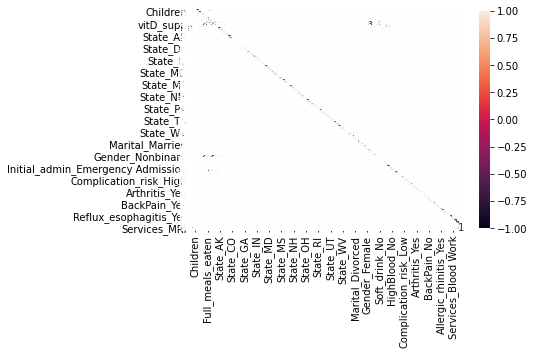

In [35]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [37]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [40]:
correlation_matrix = df.corr()

correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()


In [42]:

correlation_matrix["TotalCharge"].sort_values(kind="quicksort")

ReAdmis_No                            -0.843726
Complication_risk_Medium              -0.068781
Initial_admin_Observation Admission   -0.066870
Initial_admin_Elective Admission      -0.057207
BackPain_No                           -0.035828
                                         ...   
Complication_risk_High                 0.084038
Initial_admin_Emergency Admission      0.106985
ReAdmis_Yes                            0.843726
Initial_days                           0.987640
TotalCharge                            1.000000
Name: TotalCharge, Length: 109, dtype: float64

In [57]:
ay = abs(df.corr())['TotalCharge'].to_string()
